In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

In [ ]:
# import pandas as pd
# from mlxtend.frequent_patterns import fpgrowth, association_rules

# # Sample transactions dataset
# dataset = [
#     ['a', 'b'],
#     ['b', 'c', 'd'],
#     ['a', 'c', 'd', 'e'],
#     ['a', 'd', 'e'],
#     ['a', 'b', 'c'],
#     ['a', 'b', 'c', 'd'],
#     ['a'],
#     ['a', 'b', 'c'],
#     ['a', 'b', 'd'],
#     ['b', 'c', 'e']
# ]

# # Convert dataset into one-hot encoded DataFrame
# all_items = sorted(set(item for trans in dataset for item in trans))
# df = pd.DataFrame([[1 if item in trans else 0 for item in all_items]
#                    for trans in dataset], columns=all_items)

# print("One-Hot Encoded Transactions:\n", df)

# # Apply FP-Growth Algorithm
# frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)

# print("\nFrequent Itemsets (min_support=0.2):")
# print(frequent_itemsets)

# # Generate Association Rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
# print("\nAssociation Rules:")
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


In [ ]:
dataset=[['milk','bread'],
         ['milk','bread','egg'],
         ['milk','egg'],
         ['bread','egg'],
         ['milk','bread','egg']
         ]


In [ ]:
te=TransactionEncoder()
data=te.fit_transform(dataset)
df=pd.DataFrame(data,columns=te.columns_)
df


,bread,egg,milk
0,True,False,True
1,True,True,True
2,False,True,True
3,True,True,False
4,True,True,True


In [ ]:
a=apriori(df,use_colnames=True,min_support=0.07)

In [ ]:
b=fpgrowth(df,min_support=0.07,use_colnames=True)


In [ ]:
b

,support,itemsets
0,0.8,(milk)
1,0.8,(bread)
2,0.8,(egg)
3,0.6,"(bread, milk)"
4,0.6,"(egg, bread)"
5,0.4,"(egg, bread, milk)"
6,0.6,"(egg, milk)"


In [ ]:
rules=association_rules(a,metric='confidence',min_threshold=0.7)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(egg),(bread),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
1,(bread),(egg),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
2,(bread),(milk),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
3,(milk),(bread),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
4,(egg),(milk),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75
5,(milk),(egg),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.25,0.6,-0.25,0.75


In [ ]:
import pandas as pd
df = pd.read_csv("/content/groceries_dataset.csv", on_bad_lines="skip")

# Select first 5 rows and first 4 columns


df.head(10)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [ ]:
basekts = df.groupby(['Member_number', 'itemDescription'])['Date'].count()
basekts.head(10)

Member_number  itemDescription    
1000           canned beer            1
               hygiene articles       1
               misc. beverages        1
               pastry                 1
               pickled vegetables     1
               salty snack            1
               sausage                2
               semi-finished bread    1
               soda                   1
               whole milk             2
Name: Date, dtype: int64

In [ ]:
basekts = df.groupby(['Member_number', 'itemDescription'])['Date'].count()

basekts = basekts.unstack().reset_index().fillna(0).set_index('Member_number')
basekts

basekts = basekts.applymap(
    lambda x: False if x < 1 else True
)
df = basekts
df
a=apriori(df,use_colnames=True,min_support=0.05)
b=fpgrowth(df,min_support=0.07,use_colnames=True)

a

/tmp/ipython-input-14-1920849044.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basekts = basekts.applymap(


,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(whole milk, other vegetables, tropical fruit)"
161,0.071832,"(whole milk, other vegetables, yogurt)"
162,0.065162,"(rolls/buns, soda, whole milk)"
163,0.065931,"(rolls/buns, yogurt, whole milk)"


In [ ]:
# import pandas as pd
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori

# # Load dataset
# df = pd.read_csv("/content/groceries_dataset.csv", on_bad_lines="skip")

# # Step 1: Create list of items per transaction
# transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

# # Step 2: TransactionEncoder
# t = TransactionEncoder()
# data = t.fit_transform(transactions)

# df_encoded = pd.DataFrame(data, columns=t.columns_)

# # Step 3: Apriori
# frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
# print(frequent_itemsets.head())


In [ ]:
a=apriori(df,use_colnames=True,min_support=0.05)
b=fpgrowth(df,min_support=0.07,use_colnames=True)

a

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(whole milk, other vegetables, tropical fruit)"
161,0.071832,"(whole milk, other vegetables, yogurt)"
162,0.065162,"(rolls/buns, soda, whole milk)"
163,0.065931,"(rolls/buns, yogurt, whole milk)"


In [ ]:
b

,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.177527,(pastry)
...,...,...
78,0.070292,"(whole milk, domestic eggs)"
79,0.072345,"(whole milk, newspapers)"
80,0.092355,"(whole milk, citrus fruit)"
81,0.077476,"(other vegetables, citrus fruit)"


In [ ]:
rules=association_rules(a,metric='confidence',min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,1.0,0.005773,1.083966,0.129082,0.114055,0.077462,0.279885
1,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,1.0,0.005773,1.017719,0.182309,0.114055,0.017410,0.279885
2,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
3,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,"(whole milk, yogurt)",(soda),0.150590,0.313494,0.054387,0.361158,1.152042,1.0,0.007178,1.074611,0.155374,0.132749,0.069430,0.267322
256,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,1.0,0.009720,1.225537,0.198033,0.108495,0.184031,0.338298
257,(whole milk),"(yogurt, soda)",0.458184,0.097486,0.054387,0.118701,1.217622,1.0,0.009720,1.024073,0.329867,0.108495,0.023507,0.338298
258,(soda),"(whole milk, yogurt)",0.313494,0.150590,0.054387,0.173486,1.152042,1.0,0.007178,1.027702,0.192243,0.132749,0.026955,0.267322


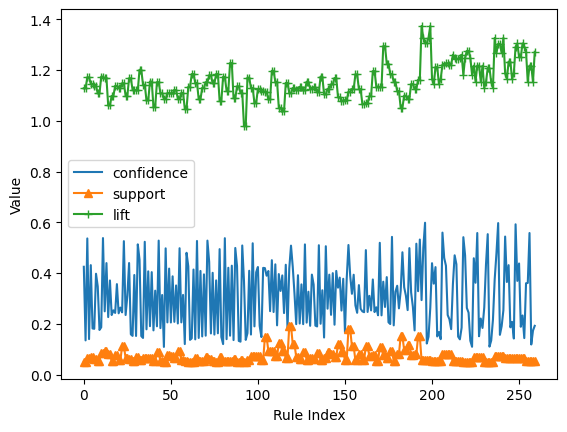

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(rules.index,rules['confidence'],label='confidence',marker="+")
# plt.plot(rules.index,rules['support'],label='support',marker='^')
# plt.xlabel('confidence')
# plt.ylabel('ab')
# plt.legend("cd")
# plt.show()
import matplotlib.pyplot as plt

plt.plot(rules.index, rules['confidence'], label='confidence', marker="")
plt.plot(rules.index, rules['support'], label='support', marker='^')
plt.plot(rules.index, rules['lift'], label='lift', marker='+')

plt.xlabel('Rule Index')   # index of rules, not confidence
plt.ylabel('Value')        # both confidence & support
plt.legend()  # pass as a list
plt.show()


<Axes: ylabel='Frequency'>

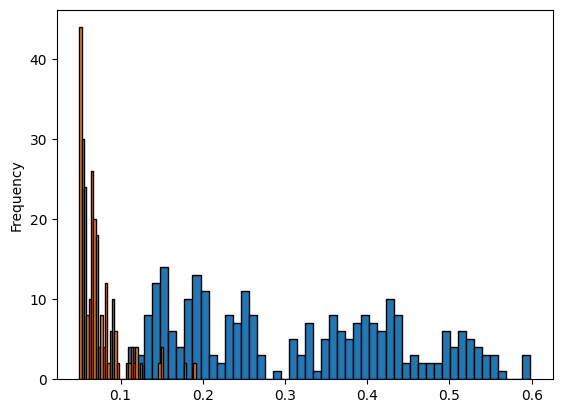

In [ ]:
rules['confidence'].plot(kind='hist',bins=50,edgecolor='black')
rules['support'].plot(kind='hist',bins=50,edgecolor='black')


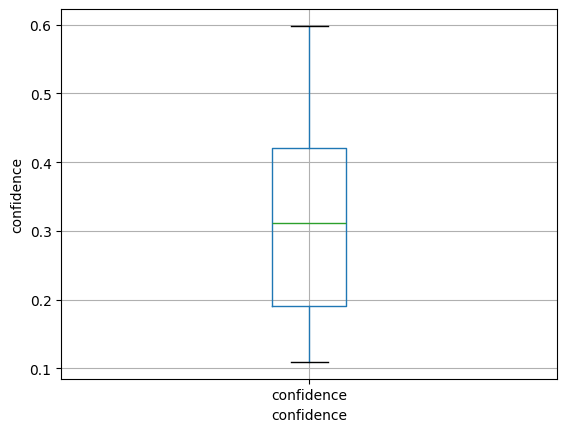

In [ ]:
rules[['confidence']].boxplot(grid=True,label='confidence')

plt.ylabel('confidence')
plt.xlabel('confidence')
plt.show()

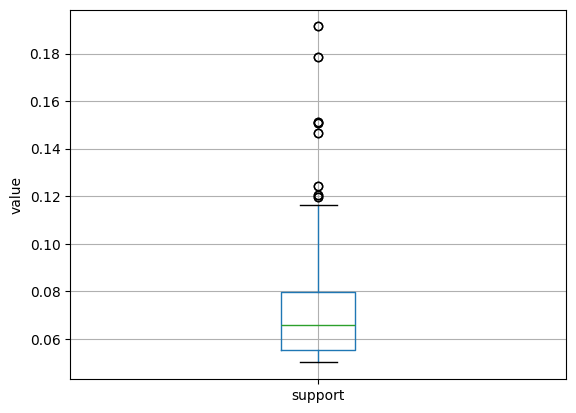

In [ ]:
rules[['support']].boxplot(grid=True,label='support')


plt.ylabel('value')
plt.show()

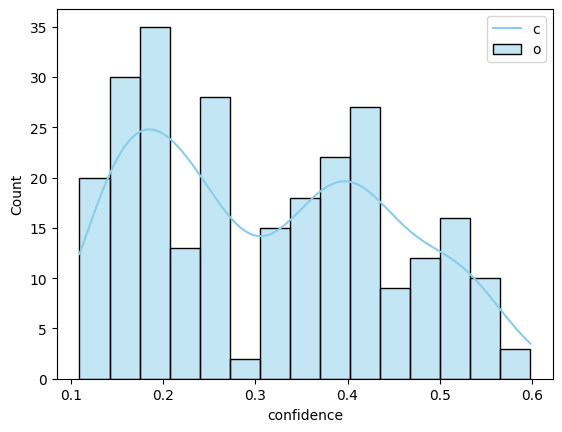

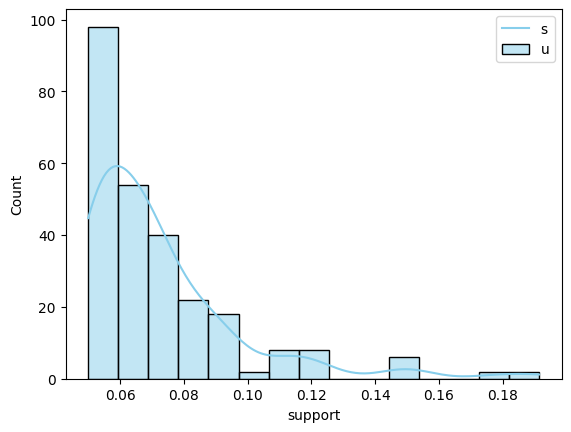

In [ ]:
import seaborn as sns

sns.histplot(rules['confidence'],kde=True,bins=15,color='skyblue')

plt.xlabel('confidence')
plt.legend("confidence")
plt.show()
sns.histplot(rules['support'],kde=True,bins=15,color='skyblue')

plt.xlabel('support')
plt.legend("support")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

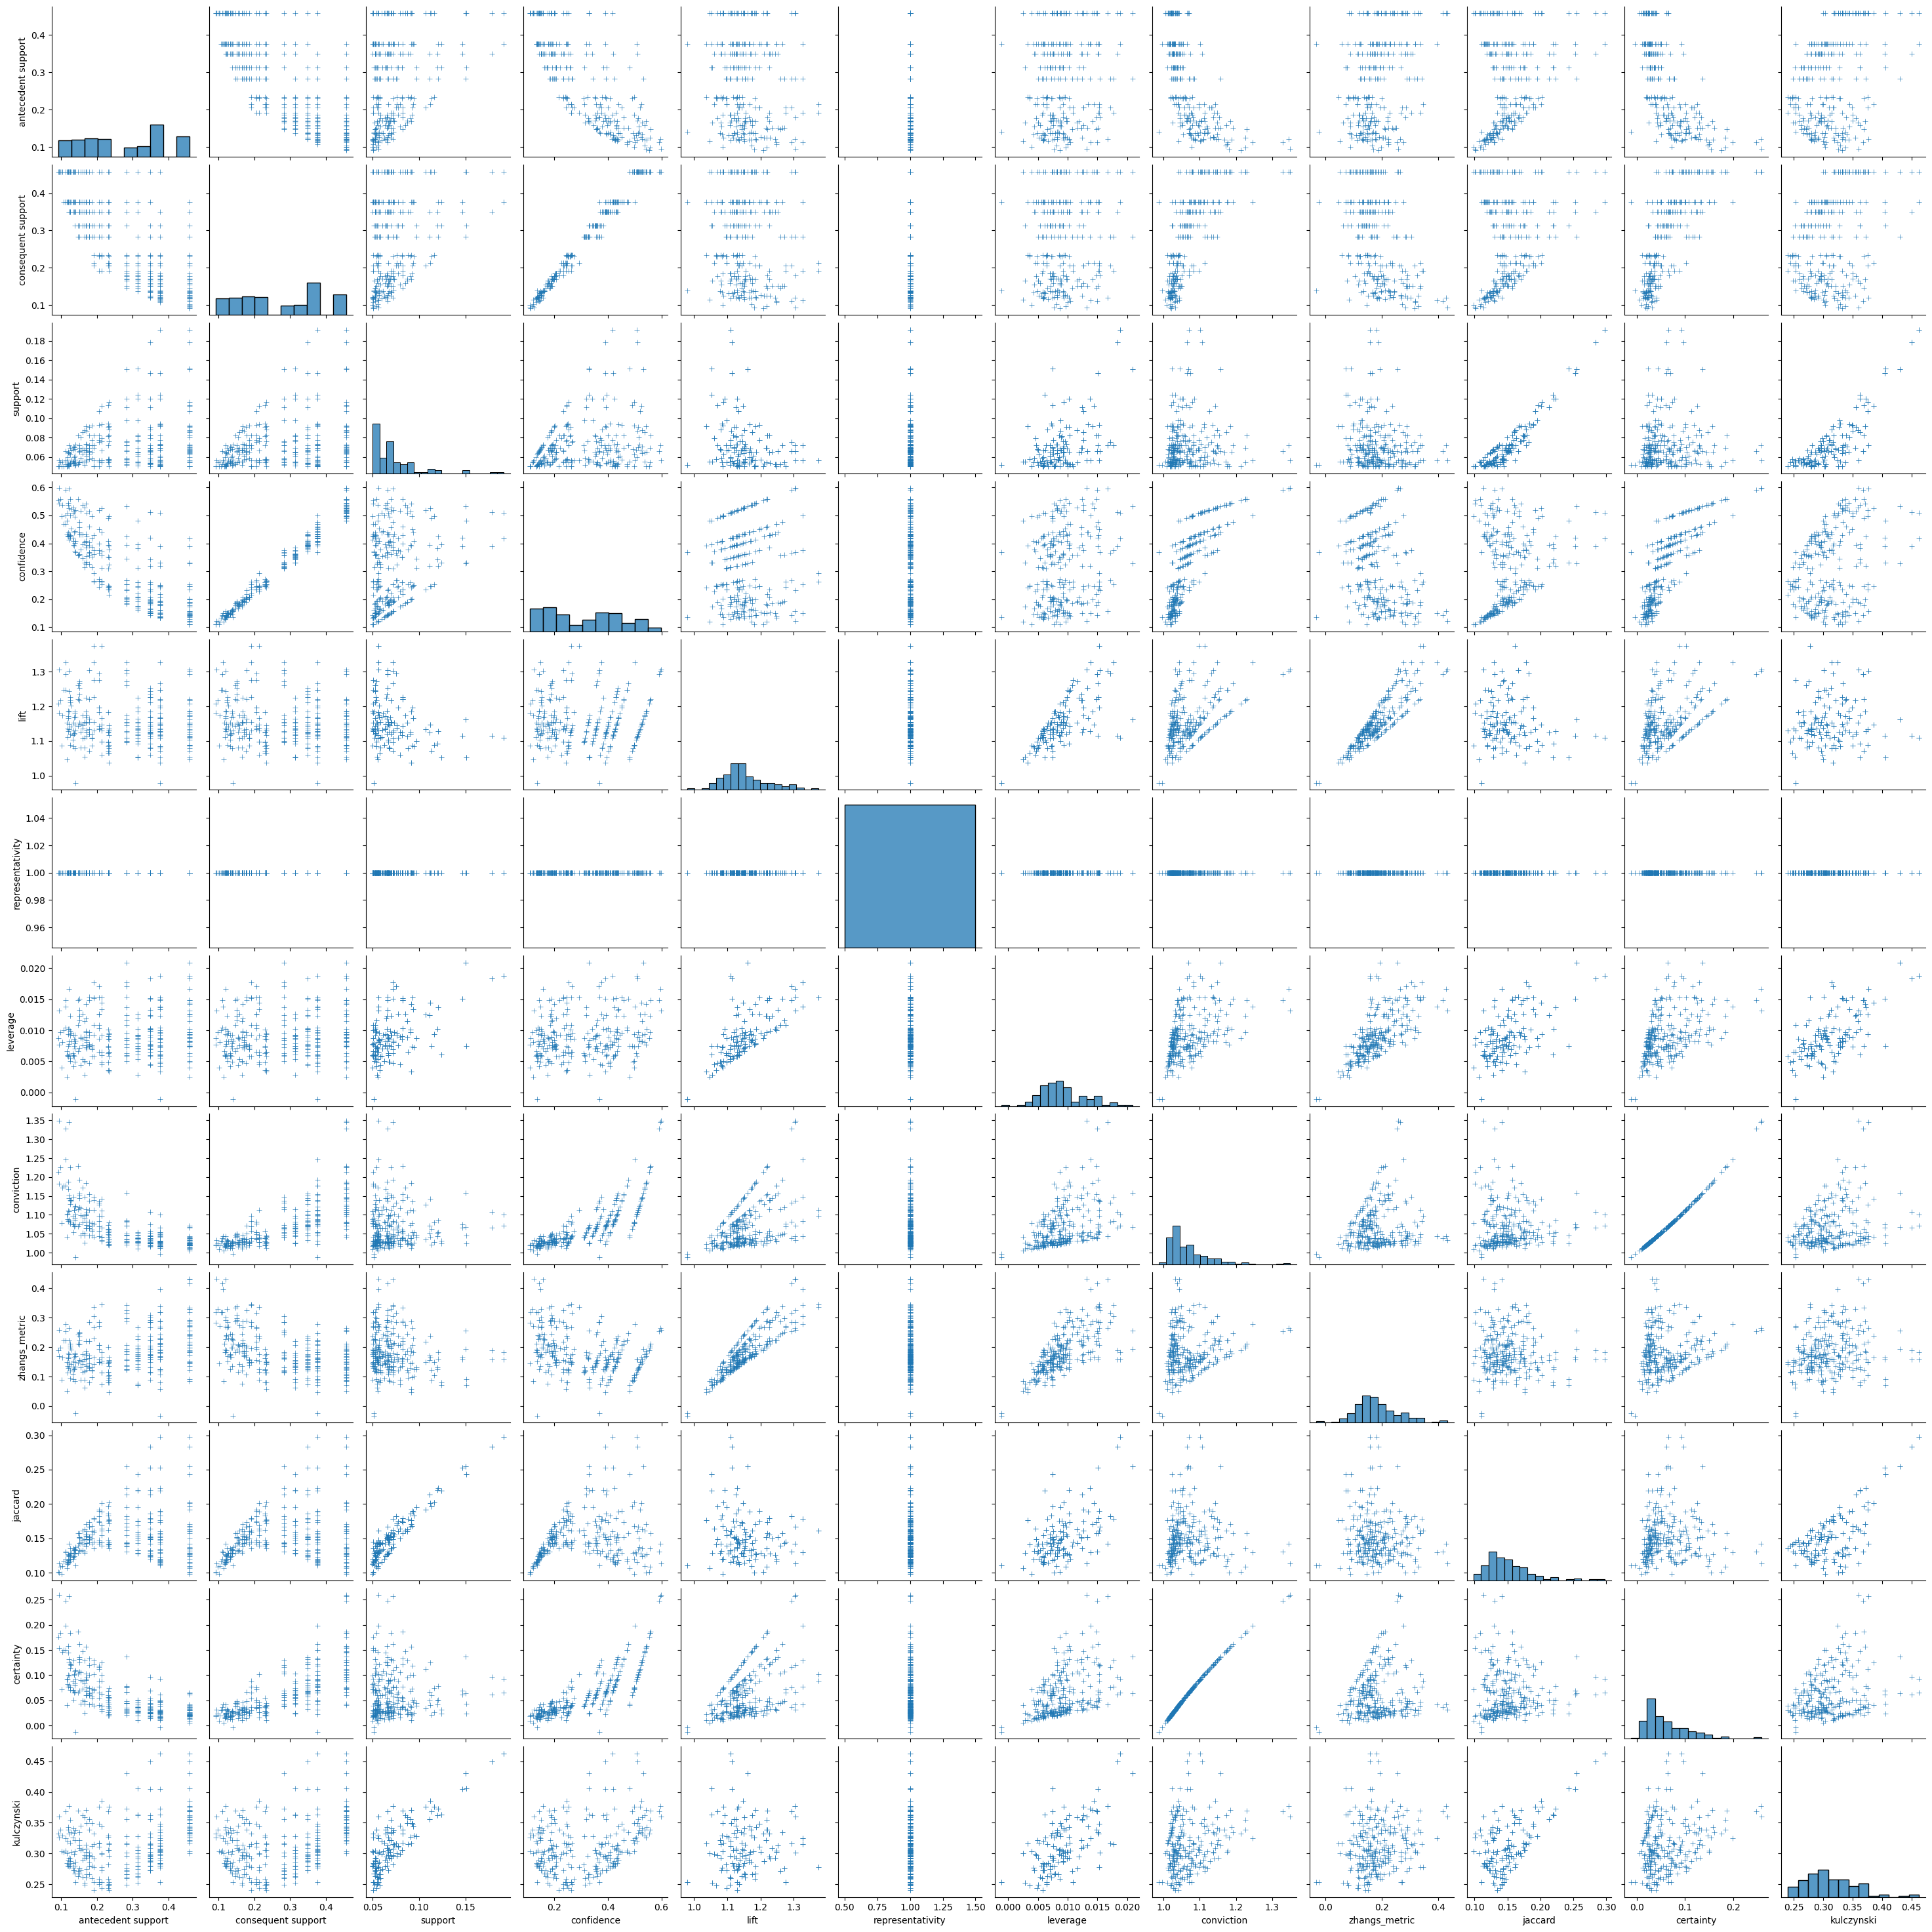

In [ ]:
sns.pairplot(rules,markers='+',palette='husl')
plt.show()

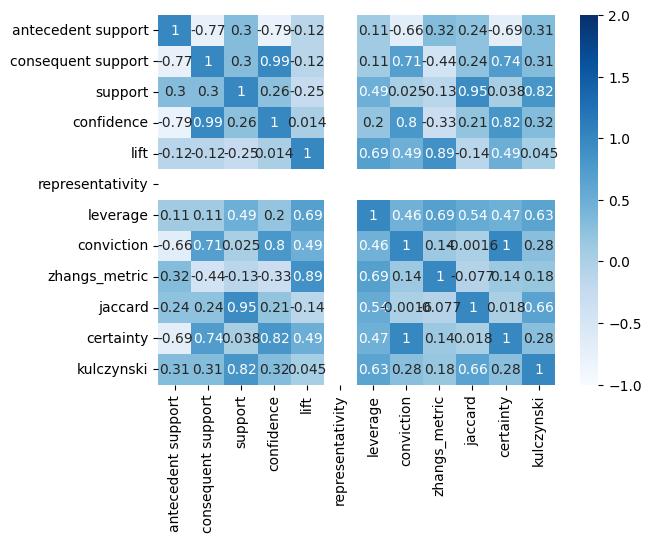

In [ ]:
corr=rules.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True,cmap='Blues',robust=True,vmin=-1,vmax=2)
plt.show()

In [ ]:
# sns.countplot(rules['support'])
# plt.yticks(rotation=45)
# plt.show()

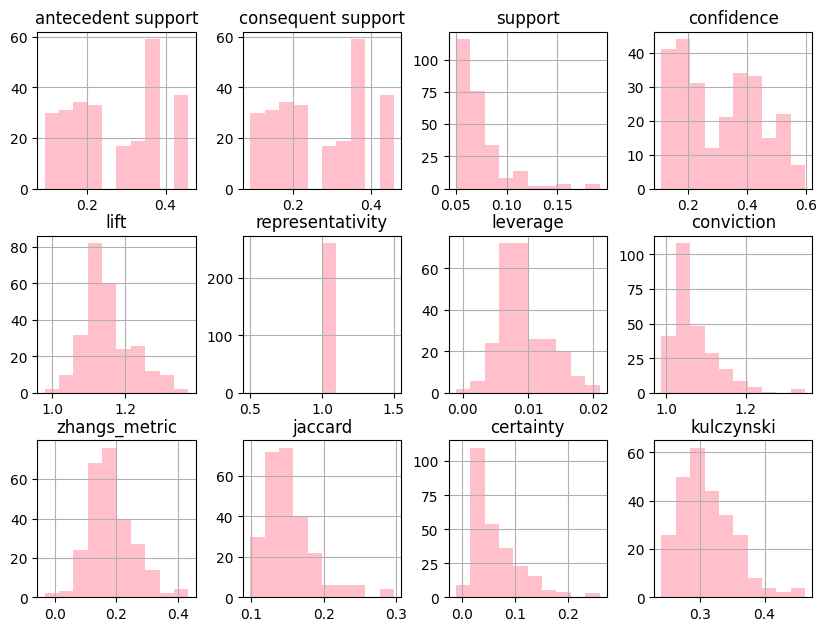

In [ ]:
rules.hist(figsize=(10,10),color='pink',bins=10,align='mid',layout=(4,4))
plt.show()

In [ ]:
rules=association_rules(b,metric='confidence',min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,1.0,0.007465,1.024310,0.091184,0.243489,0.023733,0.405892
1,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,1.0,0.007465,1.045971,0.071966,0.243489,0.043950,0.405892
2,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,1.0,0.010187,1.044316,0.130743,0.220491,0.042436,0.362393
3,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,1.0,0.010187,1.052593,0.123855,0.220491,0.049965,0.362393
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,1.0,0.006103,1.032237,0.071601,0.219402,0.031230,0.362886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,(citrus fruit),(whole milk),0.185480,0.458184,0.092355,0.497925,1.086737,1.0,0.007371,1.079155,0.097990,0.167520,0.073349,0.349747
94,(other vegetables),(citrus fruit),0.376603,0.185480,0.077476,0.205722,1.109135,1.0,0.007623,1.025485,0.157839,0.159873,0.024852,0.311713
95,(citrus fruit),(other vegetables),0.185480,0.376603,0.077476,0.417704,1.109135,1.0,0.007623,1.070584,0.120803,0.159873,0.065930,0.311713
96,(rolls/buns),(citrus fruit),0.349666,0.185480,0.071832,0.205429,1.107556,1.0,0.006976,1.025107,0.149325,0.155039,0.024492,0.296352


In [ ]:





# Load grocery dataset
df = pd.read_csv("groceries_dataset.csv")
df=df.iloc[:50,:]
# Inspect data
print(df.head())

# Convert to list of transactions
# Assuming dataset has columns: "Member_number", "itemDescription"
transactions = df.groupby("Member_number")["itemDescription"].apply(list).tolist()

print("Number of transactions:", len(transactions))
print("First transaction:", transactions[0])



   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
Number of transactions: 49
First transaction: ['tropical fruit']


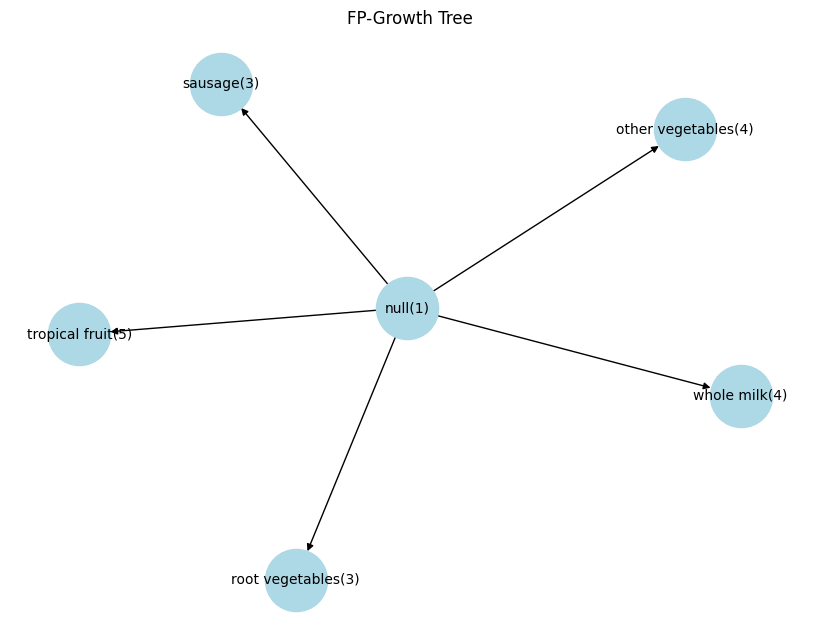

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# FP-Tree Node
class FPNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}

class FPTree:
    def __init__(self, transactions, min_support):
        self.min_support = min_support
        self.headers = {}
        self.root = self.build_tree(transactions)

    def build_tree(self, transactions):
        # Count frequency
        item_counts = defaultdict(int)
        for t in transactions:
            for item in t:
                item_counts[item] += 1
        item_counts = {k: v for k, v in item_counts.items() if v >= self.min_support}

        # Initialize tree
        root = FPNode("null", 1, None)
        for t in transactions:
            t = [i for i in t if i in item_counts]
            t.sort(key=lambda i: item_counts[i], reverse=True)
            self.insert_tree(t, root)
        return root

    def insert_tree(self, items, node):
        if not items: return
        first = items[0]
        if first in node.children:
            node.children[first].count += 1
        else:
            node.children[first] = FPNode(first, 1, node)
        self.insert_tree(items[1:], node.children[first])

    def get_conditional_patterns(self, item):
        patterns = []
        self.find_paths(item, self.headers[item], [], patterns)
        return patterns

    def find_paths(self, item, node, path, patterns):
        if node is None: return
        if node.item == item:
            patterns.append(path)
        for child in node.children.values():
            self.find_paths(item, child, path + [node.item], patterns)

# --- Visualization ---
def draw_tree(node, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()
    if node.item != "null":
        graph.add_node(node.item + f"({node.count})")
    if parent:
        graph.add_edge(parent, node.item + f"({node.count})")
    for child in node.children.values():
        draw_tree(child, graph, node.item + f"({node.count})")
    return graph



tree = FPTree(transactions, min_support=3)

# Draw FP-Tree
graph = draw_tree(tree.root)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
plt.title("FP-Growth Tree")
plt.show()


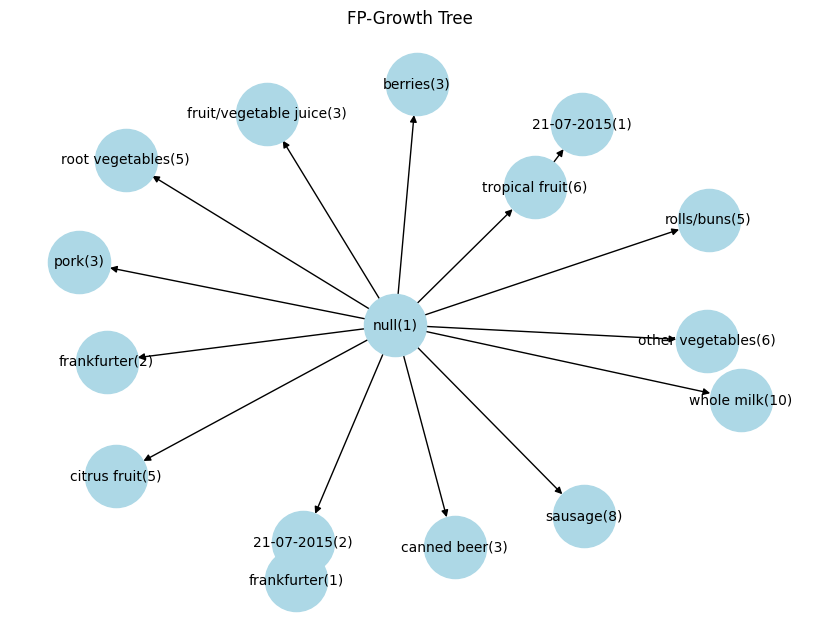

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# FP-Tree Node
class FPNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}
        self.next = None  # link to next node with same item

class FPTree:
    def __init__(self, transactions, min_support):
        self.min_support = min_support
        self.headers = {}
        self.root = self.build_tree(transactions)

    def build_tree(self, transactions):
        # Count frequency
        item_counts = defaultdict(int)
        for t in transactions:
            for item in t:
                item_counts[item] += 1
        item_counts = {k: v for k, v in item_counts.items() if v >= self.min_support}

        # Initialize header table
        for item in item_counts:
            self.headers[item] = None

        # Build tree
        root = FPNode("null", 1, None)
        for t in transactions:
            t = [i for i in t if i in item_counts]
            t.sort(key=lambda i: item_counts[i], reverse=True)
            self.insert_tree(t, root)
        return root

    def insert_tree(self, items, node):
        if not items:
            return
        first = items[0]
        if first in node.children:
            node.children[first].count += 1
        else:
            new_node = FPNode(first, 1, node)
            node.children[first] = new_node
            # Update header table
            if self.headers[first] is None:
                self.headers[first] = new_node
            else:
                current = self.headers[first]
                while current.next:
                    current = current.next
                current.next = new_node
        self.insert_tree(items[1:], node.children[first])

# --- Visualization ---
def draw_tree(node, graph=None, parent=None, node_id=0):
    if graph is None:
        graph = nx.DiGraph()

    # Unique label for each node using id
    current_label = f"{node.item}({node.count})_{id(node)}"

    graph.add_node(current_label, label=f"{node.item}({node.count})")
    if parent:
        graph.add_edge(parent, current_label)

    for child in node.children.values():
        draw_tree(child, graph, current_label)
    return graph


df = pd.read_csv("/content/groceries_dataset.csv", header=None)
df = df.head(100)

# Convert dataframe to list of transactions
transactions = []
for i in range(len(df)):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

tree = FPTree(transactions, min_support=3)

# Draw FP-Tree
graph = draw_tree(tree.root)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
labels = nx.get_node_attributes(graph, "label")
nx.draw(graph, pos, with_labels=True, labels=labels,
        node_size=2000, node_color="lightblue", font_size=10)
plt.title("FP-Growth Tree")
plt.show()


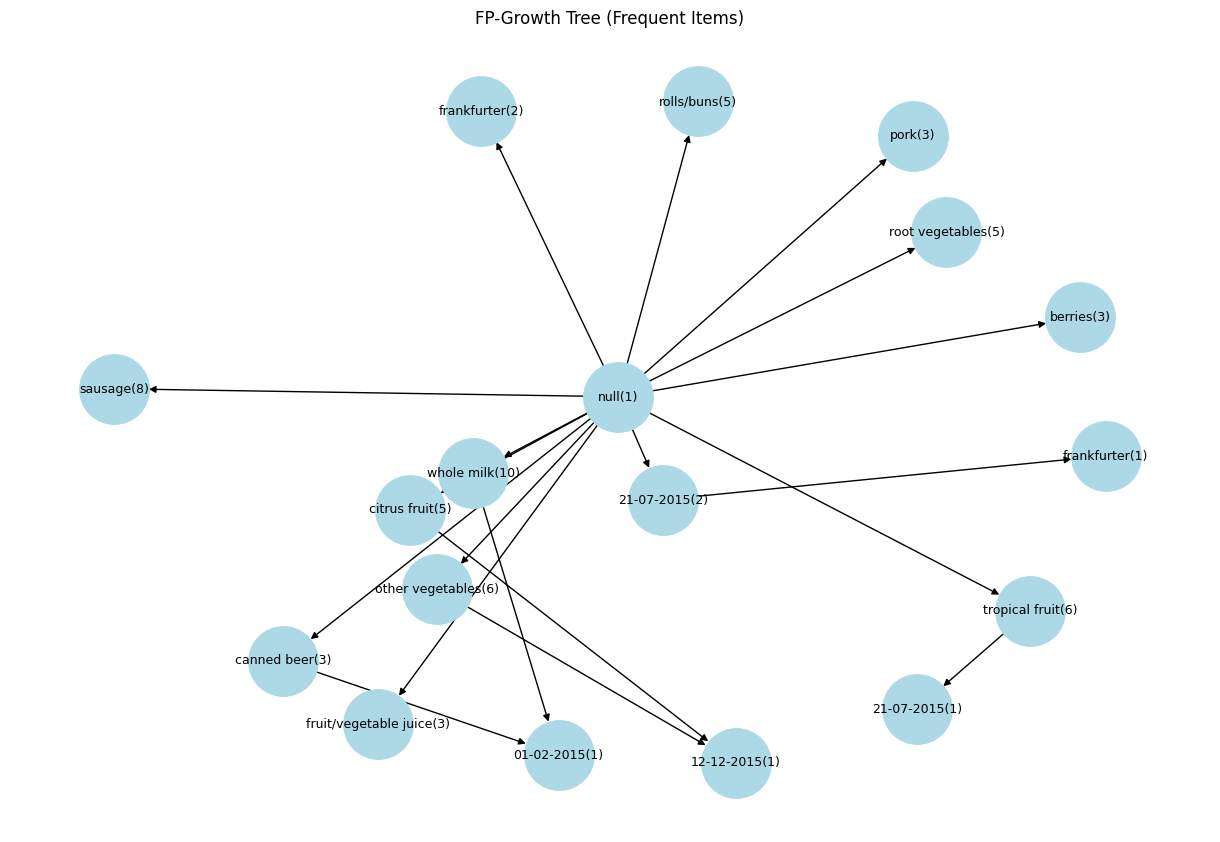

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# FP-Tree Node
class FPNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}

class FPTree:
    def __init__(self, transactions, min_support, top_n=None):
        self.min_support = min_support
        self.top_n = top_n
        self.headers = {}
        self.root = self.build_tree(transactions)

    def build_tree(self, transactions):
        # Count frequency
        item_counts = defaultdict(int)
        for t in transactions:
            for item in t:
                item_counts[item] += 1

        # Keep only items above min_support
        item_counts = {k: v for k, v in item_counts.items() if v >= self.min_support}

        # Keep only top-N items (if specified)
        if self.top_n:
            top_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)[:self.top_n]
            allowed = set([i for i, _ in top_items])
            item_counts = {k: v for k, v in item_counts.items() if k in allowed}
            # Filter transactions to allowed items only
            transactions = [[i for i in t if i in allowed] for t in transactions]

        # Initialize tree
        root = FPNode("null", 1, None)
        for t in transactions:
            t = [i for i in t if i in item_counts]   # remove infrequent
            t.sort(key=lambda i: item_counts[i], reverse=True)
            self.insert_tree(t, root)
        return root

    def insert_tree(self, items, node):
        if not items: return
        first = items[0]
        if first in node.children:
            node.children[first].count += 1
        else:
            node.children[first] = FPNode(first, 1, node)
        self.insert_tree(items[1:], node.children[first])

# --- Visualization ---
def draw_tree(node, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()
    if node.item != "null":
        graph.add_node(node.item + f"({node.count})")
    if parent:
        graph.add_edge(parent, node.item + f"({node.count})")
    for child in node.children.values():
        draw_tree(child, graph, node.item + f"({node.count})")
    return graph

# --- Load dataset ---
df = pd.read_csv("/content/groceries_dataset.csv", header=None)
df = df.head(100)

# Convert dataframe to list of transactions
transactions = []
for i in range(len(df)):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

# Build FP-Tree (with Top-15 items only)
tree = FPTree(transactions, min_support=2, top_n=15)

# Draw FP-Tree
graph = draw_tree(tree.root)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=1)  # spacing between nodes
nx.draw(graph, pos, with_labels=True, node_size=2500, node_color="lightblue", font_size=9, arrows=True)
plt.title("FP-Growth Tree (Frequent Items)")
plt.show()

In [ ]:
def build_conditional_tree(tree, item, min_support):
    """
    Build a conditional FP-tree for a given item.
    """
    # Collect conditional pattern base
    cond_patterns = []
    node = None

    # Traverse header table to find all nodes of 'item'
    def collect_paths(node):
        path = []
        parent = node.parent
        while parent and parent.item != "null":
            path.append(parent.item)
            parent = parent.parent
        return path[::-1]  # reverse to get correct order

    # Find item in tree (search recursively)
    def find_nodes(node, target):
        found = []
        if node.item == target:
            found.append(node)
        for child in node.children.values():
            found.extend(find_nodes(child, target))
        return found

    # Get all nodes of 'item'
    item_nodes = find_nodes(tree.root, item)

    for n in item_nodes:
        path = collect_paths(n)
        if path:
            # Repeat path count times (frequency of item)
            for _ in range(n.count):
                cond_patterns.append(path)

    if not cond_patterns:
        return None

    # Build conditional FP-tree
    cond_tree = FPTree(cond_patterns, min_support)
    return cond_tree
cond_tree = build_conditional_tree(tree, "whole milk", min_support=2)

# Draw conditional FP-tree
if cond_tree:
    cond_graph = draw_tree(cond_tree.root)
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(cond_graph, k=1)
    labels = nx.get_node_attributes(cond_graph, "label") if cond_graph.nodes else None
    nx.draw(cond_graph, pos, with_labels=True, node_size=2200,
            node_color="lightgreen", font_size=9, arrows=True)
    plt.title("Conditional FP-Tree for 'whole milk'")
    plt.show()

In [ ]:
# Build conditional FP-tree for item "whole milk"
cond_tree = build_conditional_tree(tree, "whole milk", min_support=2)

# Draw conditional FP-tree
if cond_tree:
    cond_graph = draw_tree(cond_tree.root)
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(cond_graph, k=1)
    labels = nx.get_node_attributes(cond_graph, "label") if cond_graph.nodes else None
    nx.draw(cond_graph, pos, with_labels=True, node_size=2200,
            node_color="lightgreen", font_size=9, arrows=True)
    plt.title("Conditional FP-Tree for 'whole milk'")
    plt.show()


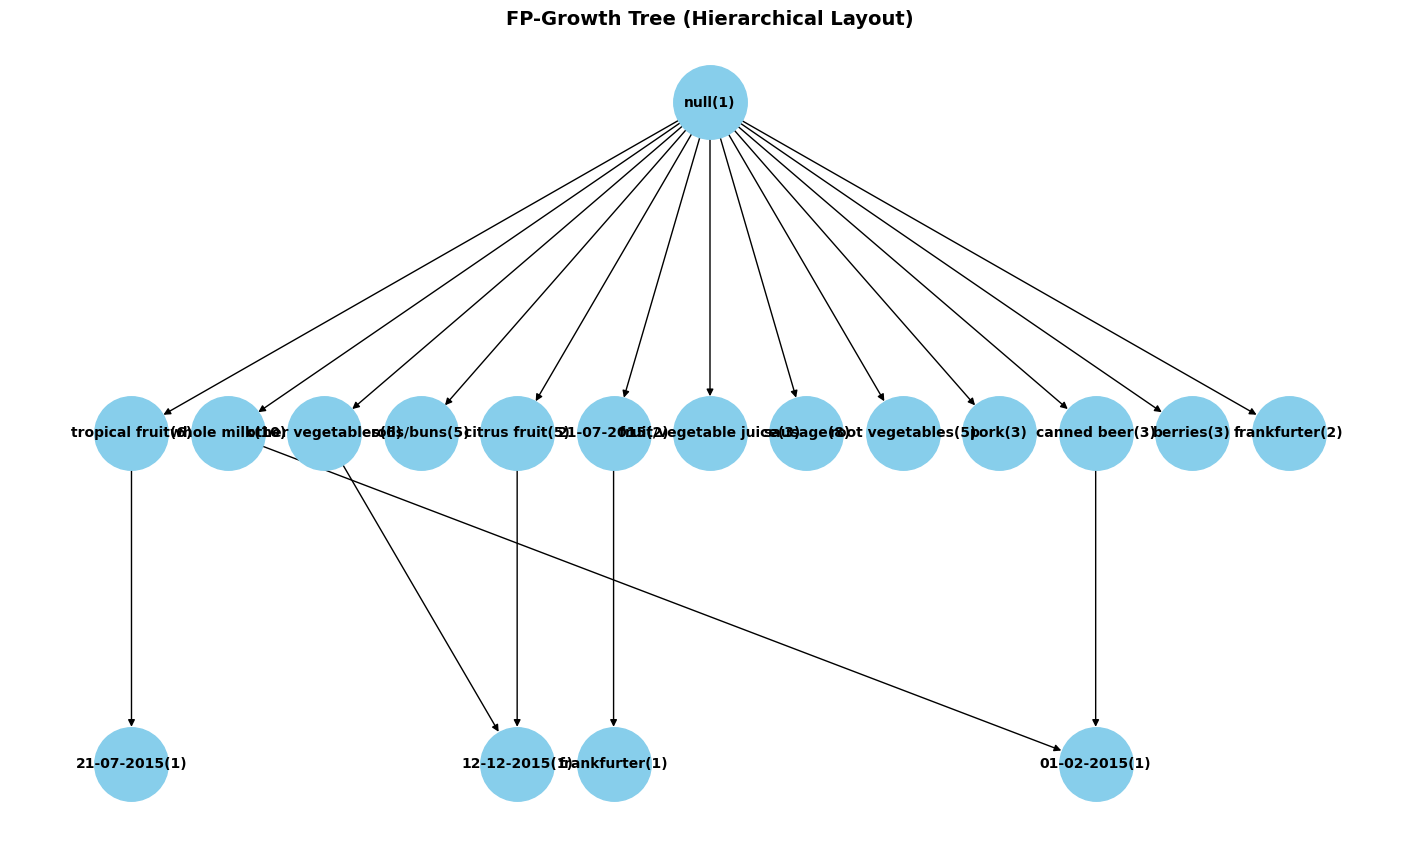

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# ---------------- FP-Tree Node ----------------
class FPNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}

# ---------------- FP-Tree ----------------
class FPTree:
    def __init__(self, transactions, min_support, top_n=None):
        self.min_support = min_support
        self.top_n = top_n
        self.root = self.build_tree(transactions)

    def build_tree(self, transactions):
        # Count frequency of items
        item_counts = defaultdict(int)
        for t in transactions:
            for item in t:
                item_counts[item] += 1

        # Keep items above min_support
        item_counts = {k: v for k, v in item_counts.items() if v >= self.min_support}

        # If top_n specified, keep only top-n frequent items
        if self.top_n:
            top_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)[:self.top_n]
            allowed = set([i for i, _ in top_items])
            item_counts = {k: v for k, v in item_counts.items() if k in allowed}
            transactions = [[i for i in t if i in allowed] for t in transactions]

        # Initialize root node
        root = FPNode("null", 1, None)

        # Insert transactions
        for t in transactions:
            t = [i for i in t if i in item_counts]   # filter infrequent
            t.sort(key=lambda i: item_counts[i], reverse=True)  # sort by frequency
            self.insert_tree(t, root)
        return root

    def insert_tree(self, items, node):
        if not items:
            return
        first = items[0]
        if first in node.children:
            node.children[first].count += 1
        else:
            node.children[first] = FPNode(first, 1, node)
        self.insert_tree(items[1:], node.children[first])

# ---------------- Tree Visualization ----------------
def draw_tree(node, graph=None, parent=None):
    """Build NetworkX graph from FP-Tree"""
    if graph is None:
        graph = nx.DiGraph()
    if node.item != "null":
        graph.add_node(node.item + f"({node.count})")
    if parent:
        graph.add_edge(parent, node.item + f"({node.count})")
    for child in node.children.values():
        draw_tree(child, graph, node.item + f"({node.count})")
    return graph

# ---------------- Hierarchical Layout ----------------
def hierarchy_pos(G, root=None, width=1., vert_gap=0.3, vert_loc=0, xcenter=0.5):
    pos = {}
    def _hierarchy_pos(G, root, width=1., vert_gap=0.3, vert_loc=0, xcenter=0.5, pos=None, parent=None):
        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.successors(root))
        if len(children) != 0:
            dx = width / len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root)
        return pos
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

def draw_tree_treeformat(node):
    """Draw FP-tree in hierarchical tree format"""
    graph = draw_tree(node)
    root = [n for n in graph.nodes if "null" in n][0]  # root node
    pos = hierarchy_pos(graph, root)  # hierarchical layout
    plt.figure(figsize=(14, 8))
    nx.draw(graph, pos, with_labels=True, node_size=2800,
            node_color="skyblue", font_size=10, arrows=True, font_weight="bold")
    plt.title("FP-Growth Tree (Hierarchical Layout)", fontsize=14, fontweight="bold")
    plt.show()

# ---------------- Load Dataset ----------------
df = pd.read_csv("/content/groceries_dataset.csv", header=None)
df = df.head(100)   # take first 100 transactions for testing

transactions = []
for i in range(len(df)):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

# ---------------- Build & Draw Tree ----------------
tree = FPTree(transactions, min_support=1, top_n=15)
draw_tree_treeformat(tree.root)


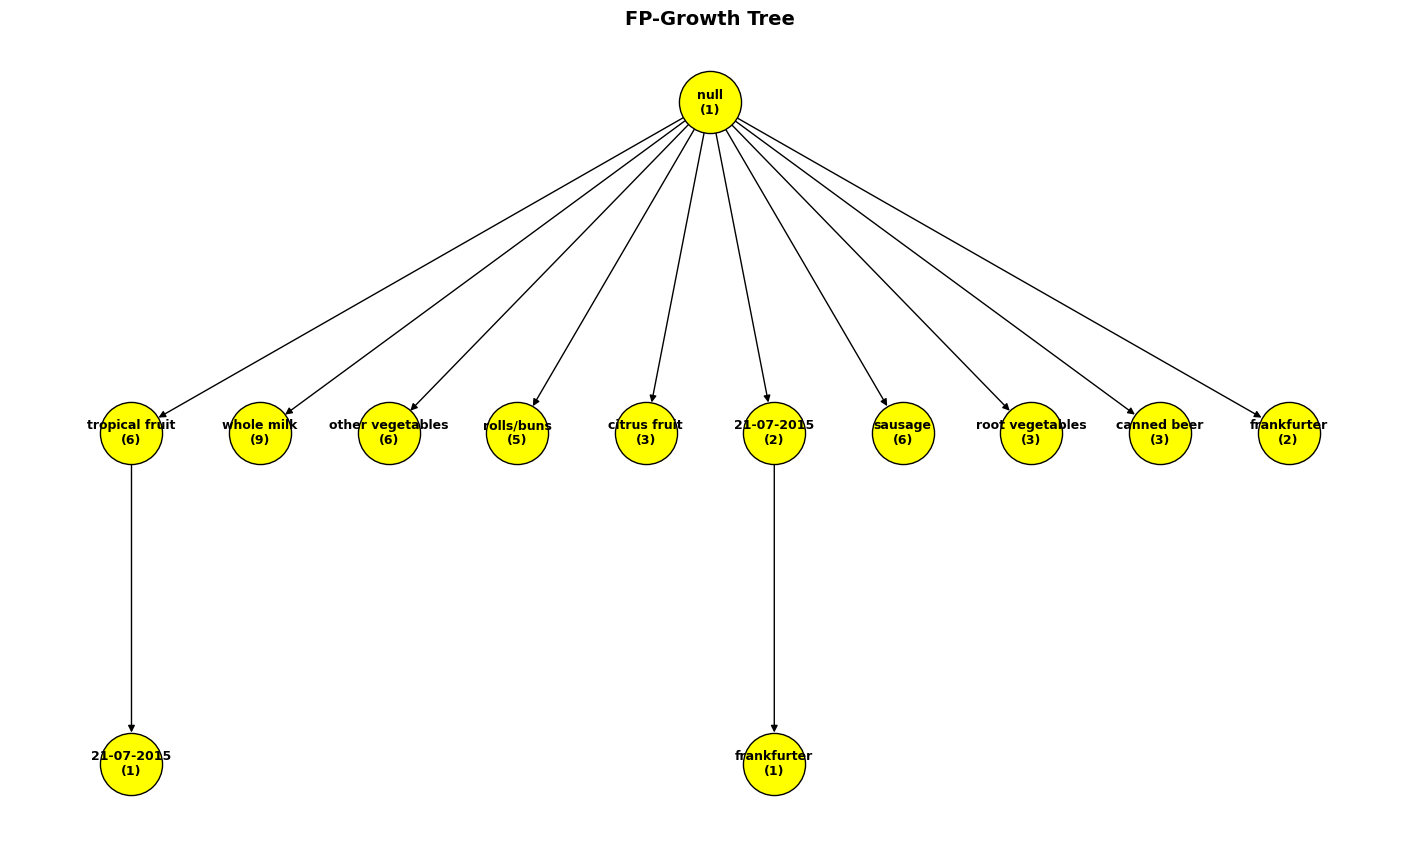

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# ---------------- FP-Tree Node ----------------
class FPNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}

# ---------------- FP-Tree ----------------
class FPTree:
    def __init__(self, transactions, min_support, top_n=None):
        self.min_support = min_support
        self.top_n = top_n
        self.root = self.build_tree(transactions)

    def build_tree(self, transactions):
        # Count frequency
        item_counts = defaultdict(int)
        for t in transactions:
            for item in t:
                item_counts[item] += 1

        # Filter by min_support
        item_counts = {k: v for k, v in item_counts.items() if v >= self.min_support}

        # Top-N filtering
        if self.top_n:
            top_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)[:self.top_n]
            allowed = set([i for i, _ in top_items])
            item_counts = {k: v for k, v in item_counts.items() if k in allowed}
            transactions = [[i for i in t if i in allowed] for t in transactions]

        root = FPNode("null", 1, None)
        for t in transactions:
            t = [i for i in t if i in item_counts]
            t.sort(key=lambda i: item_counts[i], reverse=True)
            self.insert_tree(t, root)
        return root

    def insert_tree(self, items, node):
        if not items:
            return
        first = items[0]
        if first in node.children:
            node.children[first].count += 1
        else:
            node.children[first] = FPNode(first, 1, node)
        self.insert_tree(items[1:], node.children[first])

# ---------------- Graph Construction ----------------
def build_graph(node, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()
    label = f"{node.item}\n({node.count})"
    graph.add_node(label)
    if parent:
        graph.add_edge(parent, label)
    for child in node.children.values():
        build_graph(child, graph, label)
    return graph

# ---------------- Hierarchical Layout ----------------
def hierarchy_pos(G, root=None, width=1., vert_gap=0.3, vert_loc=0, xcenter=0.5):
    pos = {}
    def _hierarchy_pos(G, root, width=1., vert_gap=0.3, vert_loc=0,
                       xcenter=0.5, pos=None, parent=None):
        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.successors(root))
        if len(children) != 0:
            dx = width / len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root)
        return pos
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

# ---------------- Tree Drawing ----------------
def draw_fp_tree(node):
    graph = build_graph(node)
    root = [n for n in graph.nodes if "null" in n][0]
    pos = hierarchy_pos(graph, root)

    plt.figure(figsize=(14, 8))
    nx.draw(graph, pos, with_labels=True,
            node_size=2000, node_color="yellow",
            font_size=9, font_weight="bold",
            edgecolors="black")
    plt.title("FP-Growth Tree", fontsize=14, fontweight="bold")
    plt.show()

# ---------------- Load Dataset ----------------
df = pd.read_csv("/content/groceries_dataset.csv", header=None)
df = df.head(80)

transactions = []
for i in range(len(df)):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

# ---------------- Build & Draw ----------------
tree = FPTree(transactions, min_support=2, top_n=10)
draw_fp_tree(tree.root)
